# Chapter 4: The Seaborn essentials for data visualization

In [2]:
import pandas as pd
import seaborn as sns

## Get the data

In [3]:
mortality_data = pd.read_pickle('mortality_prepped.pkl')
mortality_data.head()

,Year,AgeGroup,DeathRate,MeanCentered
0,1900,01-04 Years,1983.8,1790.87584
1,1901,01-04 Years,1695.0,1502.07584
2,1902,01-04 Years,1655.7,1462.77584
3,1903,01-04 Years,1542.1,1349.17584
4,1904,01-04 Years,1591.5,1398.57584


## General vs. specific

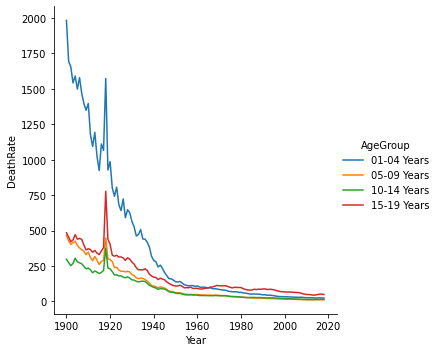

In [4]:
sns.relplot(data=mortality_data, kind='line',
            x='Year', y='DeathRate', hue='AgeGroup')

<AxesSubplot:xlabel='Year', ylabel='DeathRate'>

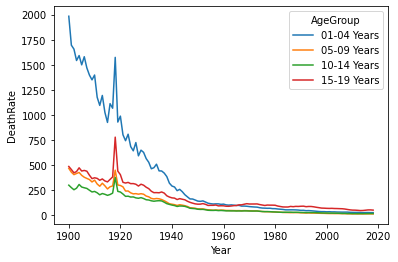

In [5]:
sns.lineplot(data=mortality_data, 
             x='Year', y='DeathRate', hue='AgeGroup')

## Basic parameters

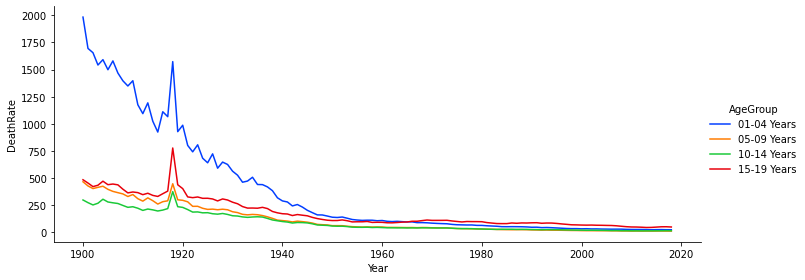

In [8]:
sns.relplot(data=mortality_data, kind='line', 
            x='Year', y='DeathRate', hue='AgeGroup', palette='bright',
            height=4, aspect=2.5)

## Subplots

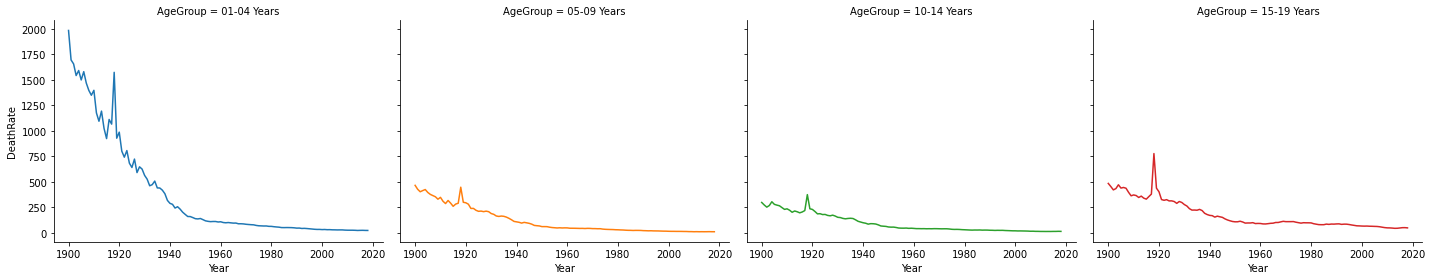

In [11]:
# sns.relplot(data=mortality_data, kind='line', 
#             x='Year', y='DeathRate', hue='AgeGroup', palette='bright',
#             height=4, aspect=2.5)
sns.relplot(data=mortality_data, 
            kind='line', x='Year', y='DeathRate', hue='AgeGroup', 
            height=4, aspect=1.25, 
            col='AgeGroup', col_wrap=4, legend=False)

## Set the title and the x and y labels

### Specific plot

[Text(0.5, 1.0, 'Deaths by Age Group'), Text(0, 0.5, 'Deaths per 100,000')]

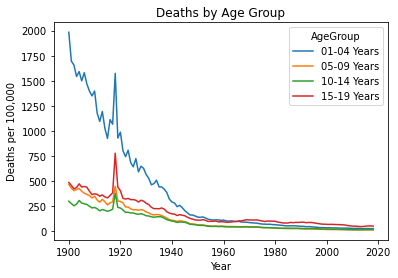

In [12]:
ax = sns.lineplot(data=mortality_data, 
                  x='Year', y='DeathRate', hue='AgeGroup')
ax.set(title='Deaths by Age Group', ylabel='Deaths per 100,000')

### General plot

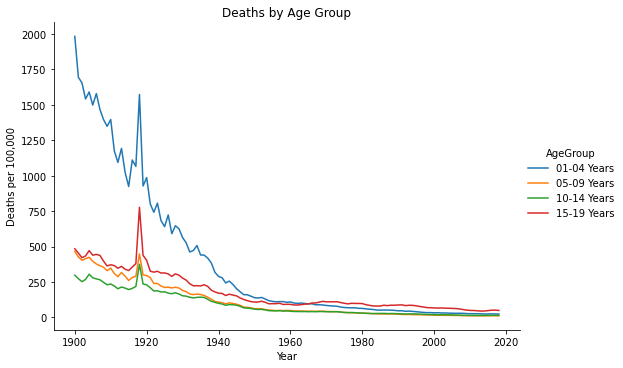

In [13]:
g = sns.relplot(data=mortality_data, kind='line',
    x='Year', y='DeathRate', hue='AgeGroup', aspect=1.5)
for ax in g.axes.flat:
    ax.set(title='Deaths by Age Group', ylabel='Deaths per 100,000')

## Set the ticks, x limits, and y limits

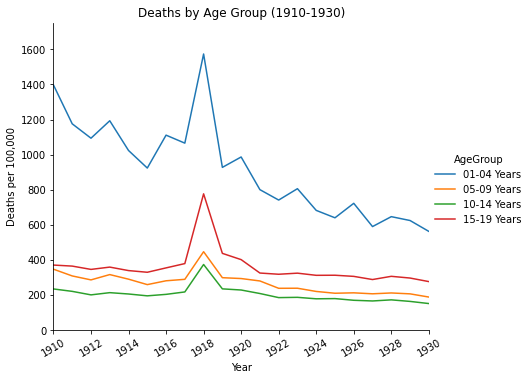

In [14]:
g = sns.relplot(data=mortality_data, kind='line',
    x='Year', y='DeathRate', hue='AgeGroup', aspect=1.25)
for ax in g.axes.flat:
    ax.set(title='Deaths by Age Group (1910-1930)', ylabel='Deaths per 100,000', 
        xticks=[x for x in range(1910, 1931, 2)], 
        xlim=(1910,1930), ylim=(0,1750)),
    ax.tick_params('x', labelrotation=30)

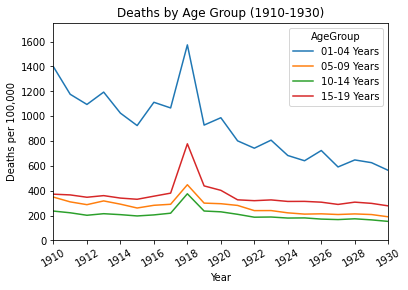

In [15]:
ax = sns.lineplot(data=mortality_data,
     x='Year', y='DeathRate', hue='AgeGroup')
ax.set(title='Deaths by Age Group (1910-1930)', 
      ylabel='Deaths per 100,000', 
      xticks=[x for x in range(1910,1931,2)], 
      xlim=(1910,1930), ylim=(0,1750))
ax.tick_params('x', labelrotation=30)

## Set the background style

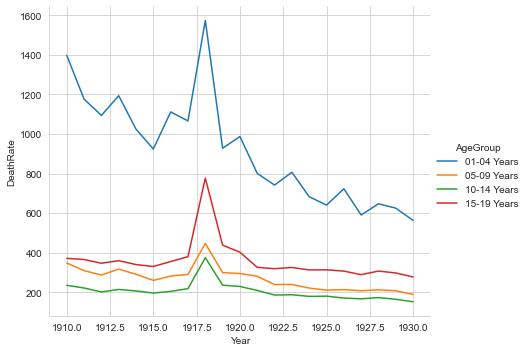

In [20]:
sns.set_style('whitegrid')
sns.relplot(data=mortality_data.query('Year >= 1910 and Year <= 1930'),
    kind='line', x='Year', y='DeathRate', hue='AgeGroup', aspect=1.25)

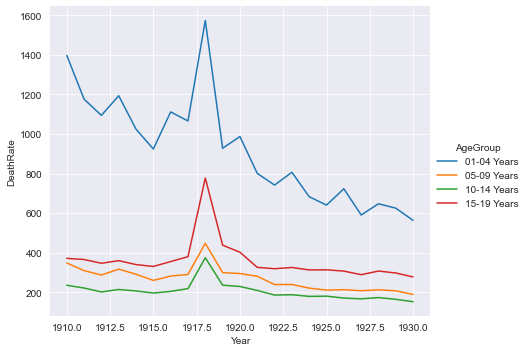

In [23]:
sns.set_style('darkgrid')
sns.relplot(data=mortality_data.query('Year >= 1910 and Year <= 1930'),
    kind='line', x='Year', y='DeathRate', hue='AgeGroup', aspect=1.25)

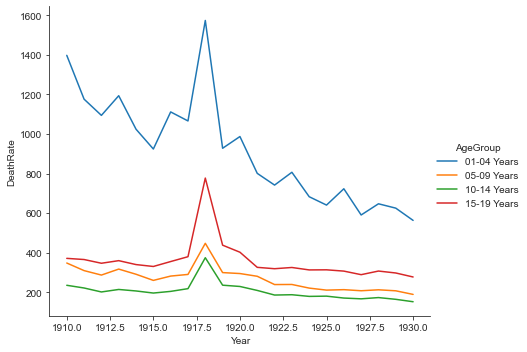

In [24]:
sns.set_style('ticks')
sns.relplot(data=mortality_data.query('Year >= 1910 and Year <= 1930'),
    kind='line', x='Year', y='DeathRate', hue='AgeGroup', aspect=1.25)

## Use the set() and suptitle() methods with subplots

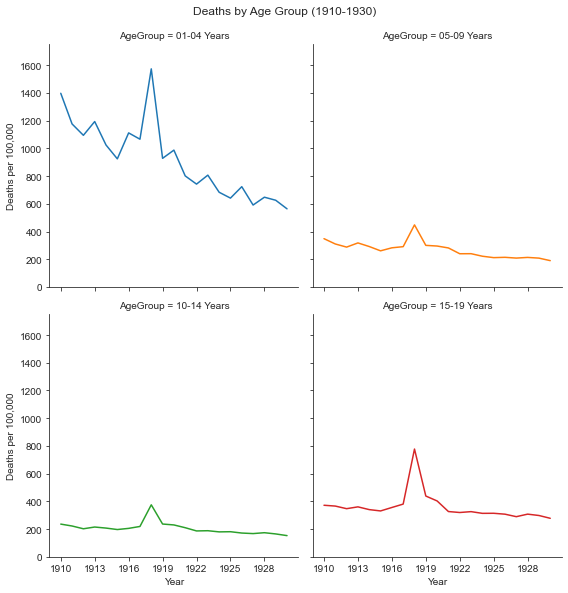

In [25]:
g = sns.relplot(data=mortality_data.query('Year >= 1910 and Year <= 1930'),
    kind='line', x='Year', y='DeathRate', hue='AgeGroup', legend=False,
    col='AgeGroup', col_wrap=2, height=4)
g.fig.suptitle('Deaths by Age Group (1910-1930)', y=1.025)
g.set(ylabel='Deaths per 100,000', 
      xticks=[x for x in range(1910,1931,3)], 
      ylim=(0,1750))

## Save a plot to a file

### General plot

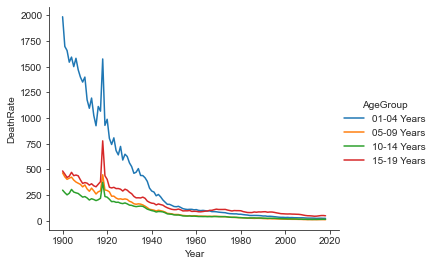

In [26]:
g = sns.relplot(data=mortality_data, kind='line',
                x='Year', y='DeathRate', hue='AgeGroup')
g.fig.subplots_adjust(bottom=0.35)  # adjust the bottom to fix the y labels
g.savefig('lineChart.png')
g.savefig('lineChart.svg')
g.savefig('figures/lineChart.pdf')

### Specific plot

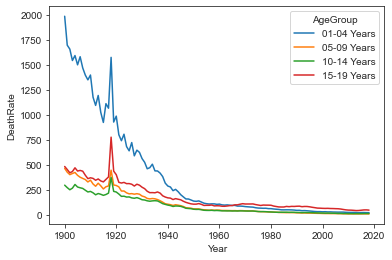

In [27]:
ax = sns.lineplot(data=mortality_data, 
                  x='Year', y='DeathRate', hue='AgeGroup')
ax.get_figure().savefig('lineChart.png')
ax.get_figure().savefig('lineChart.svg')
ax.get_figure().savefig('figures/lineChart.pdf')

## Line plots

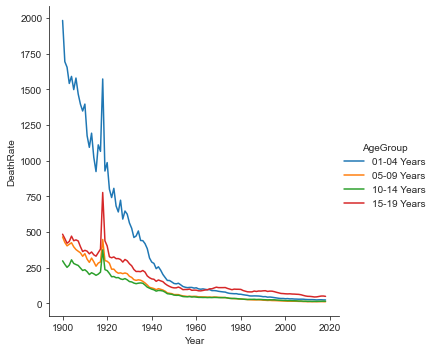

In [28]:
sns.relplot(data=mortality_data, kind='line', x='Year', y='DeathRate', 
            hue='AgeGroup')

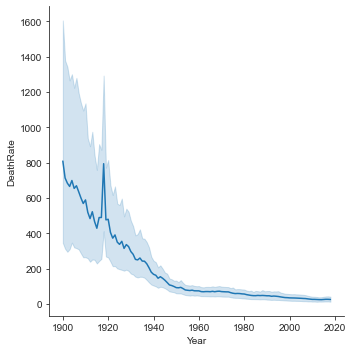

In [29]:
sns.relplot(data=mortality_data, kind='line', x='Year', y='DeathRate')

## Scatter plots

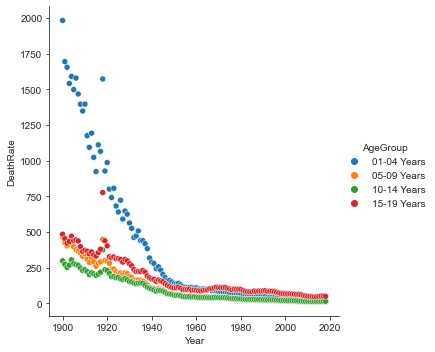

In [30]:
sns.relplot(data=mortality_data, kind='scatter', x='Year', y='DeathRate', 
            hue='AgeGroup')

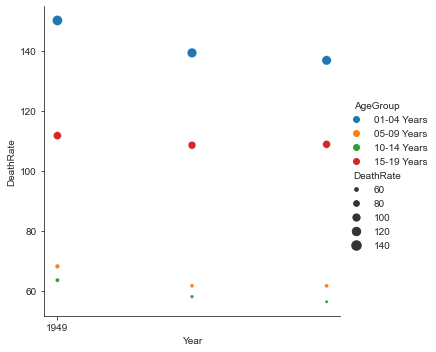

In [34]:
g = sns.relplot(data=mortality_data.query('Year >= 1949 and Year <= 1951'), 
    kind='scatter', x='Year', y='DeathRate', hue='AgeGroup', 
    size='DeathRate', sizes=(10,100))
for ax in g.axes.flat:
    ax.set(xticks=[x for x in range(1949,1951,2)])

## Bar plots

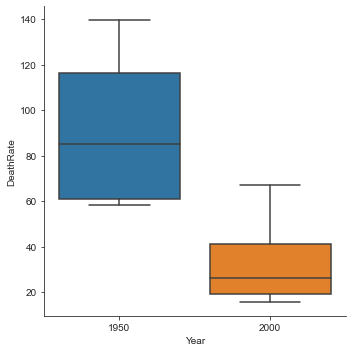

In [36]:
sns.catplot(data=mortality_data.query('Year in (1950,2000)'), 
            kind='box', x='Year', y='DeathRate', ci=50)

In [40]:
mortality_data.query('Year in (1950,2000)').groupby('Year').mean('DeathRate')

,DeathRate,MeanCentered
Year,,
1950,91.95,-100.97416
2000,33.90,-159.02416


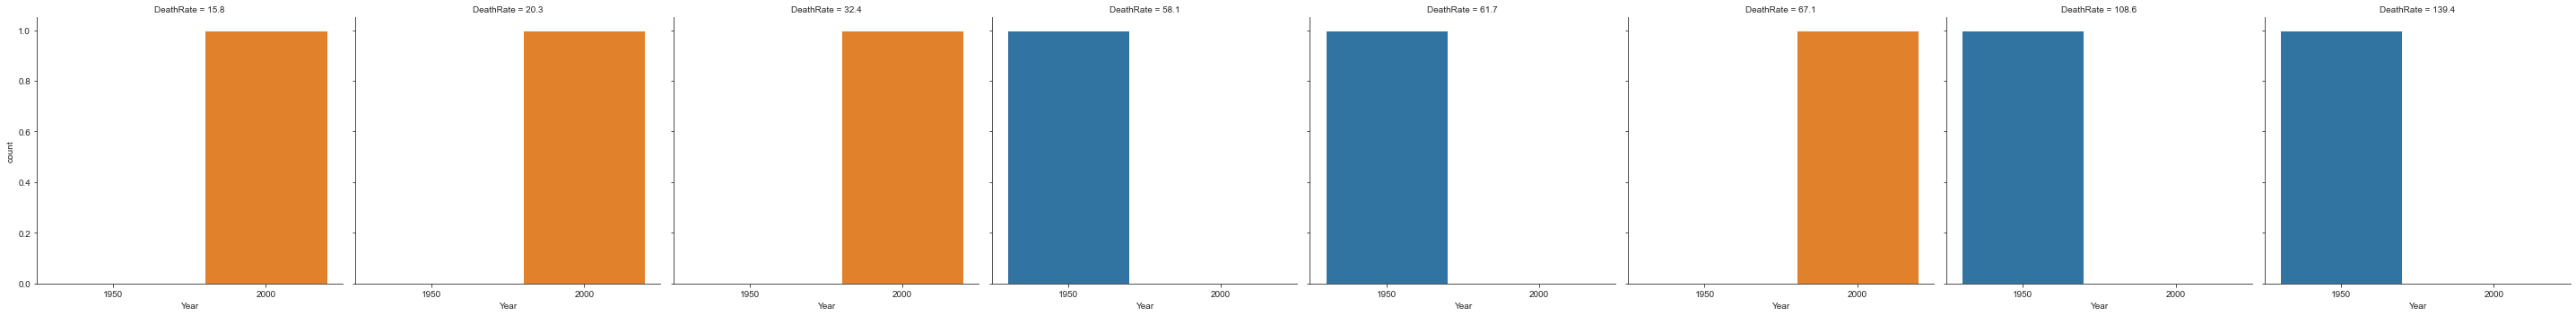

In [46]:
sns.catplot(data=mortality_data.query('Year in (1950,2000)'), 
            kind='count', col='DeathRate', x='Year', ci=50)

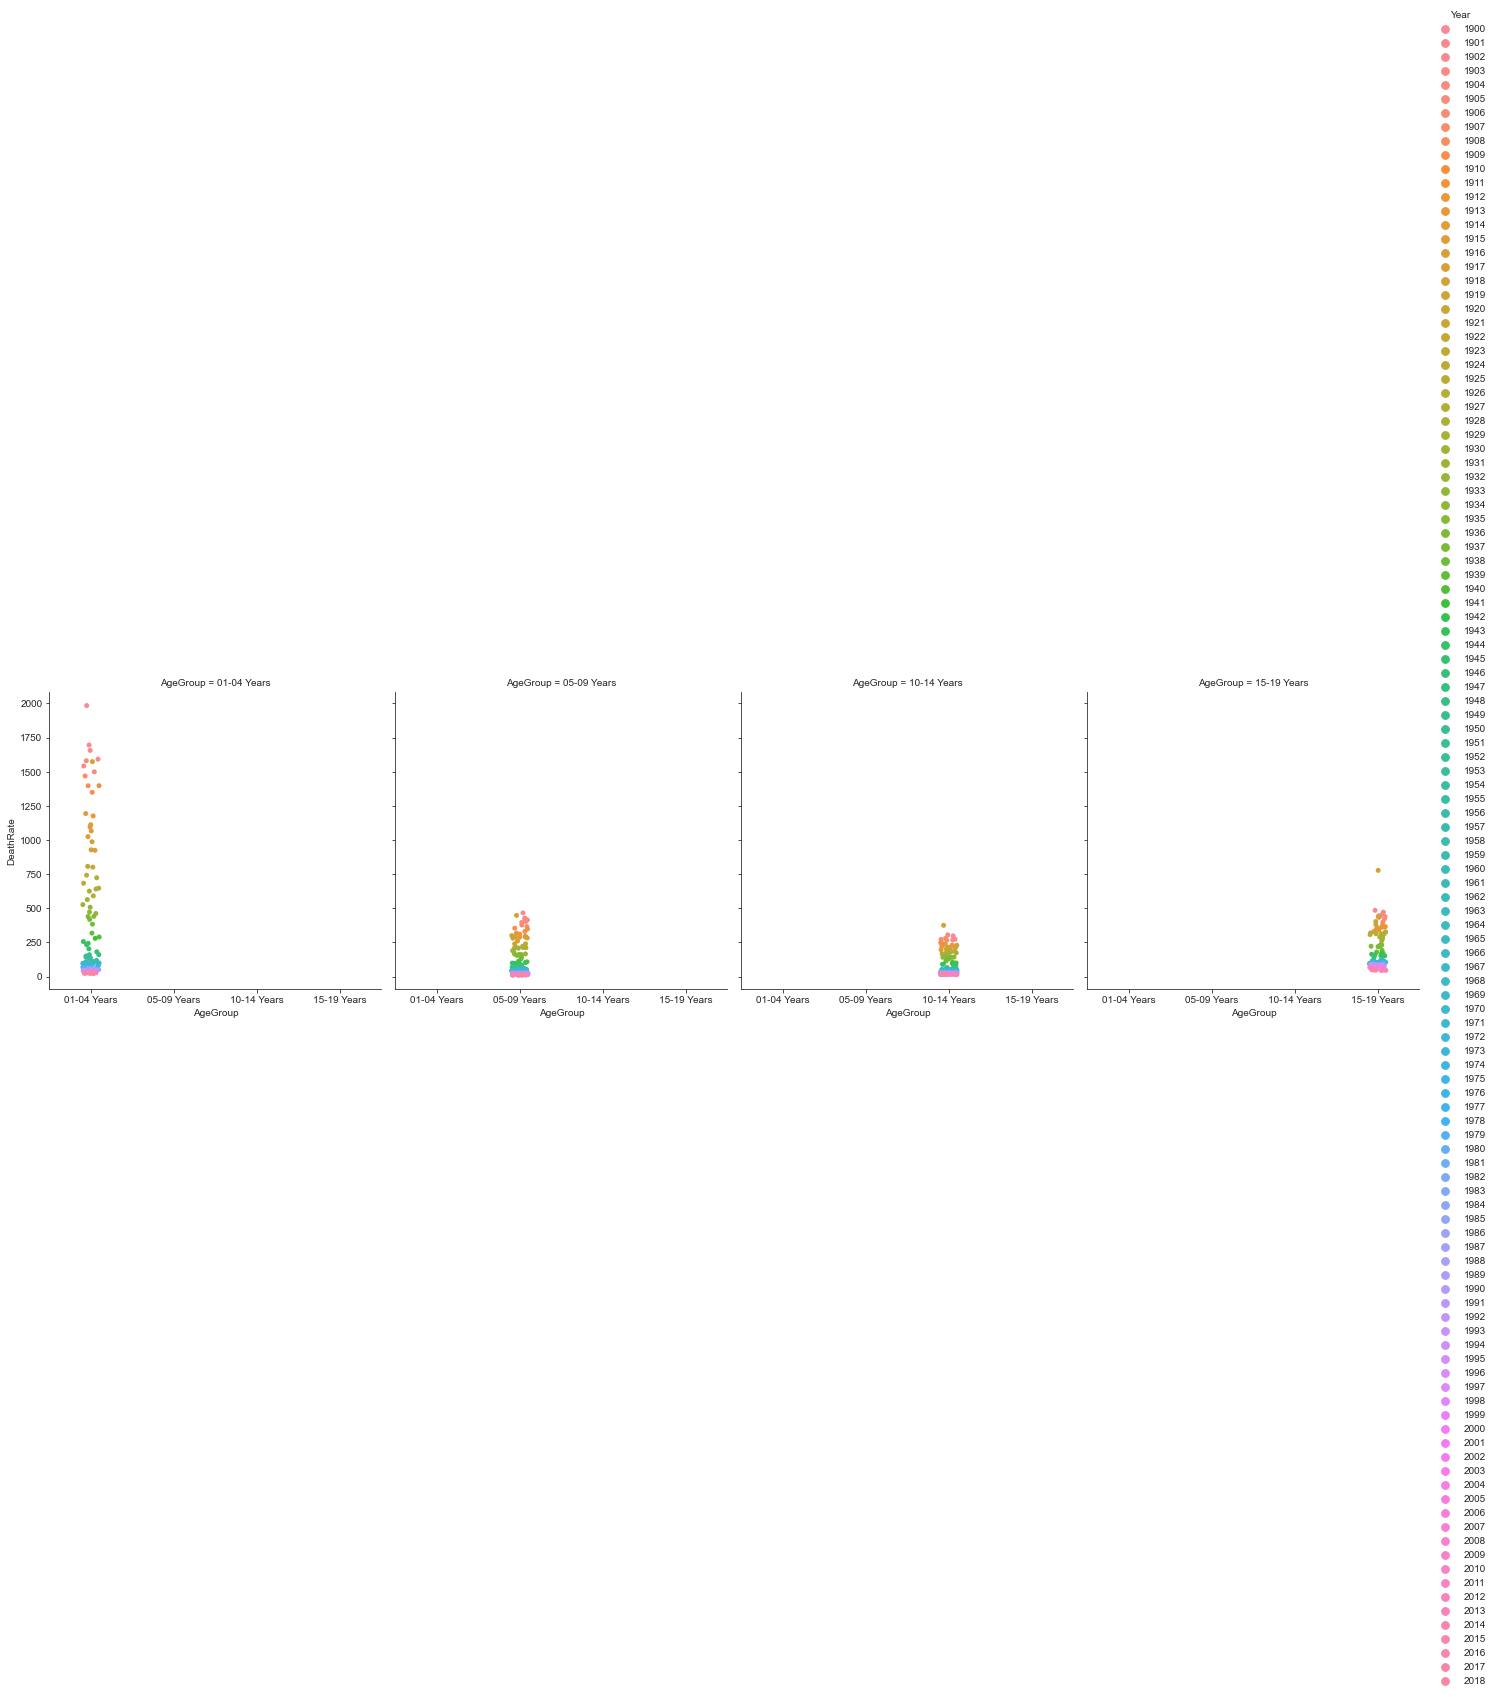

In [49]:
sns.catplot(x='AgeGroup' , hue='Year', y='DeathRate',  col='AgeGroup', data=mortality_data)

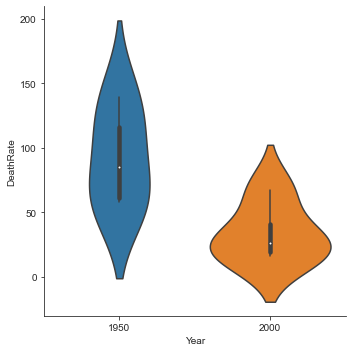

In [43]:
sns.catplot(data=mortality_data.query('Year in (1950,2000)'), 
            kind='violin', x='Year', y='DeathRate', ci=50)

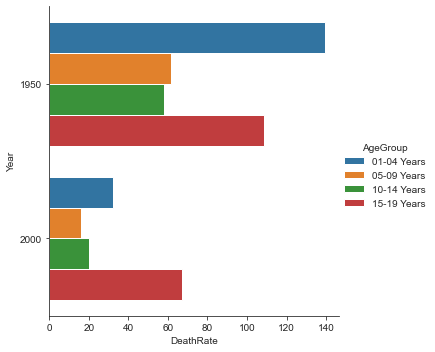

In [42]:
sns.catplot(data=mortality_data.query('Year in (1950,2000)'), 
            kind='bar', x='DeathRate', y='Year', hue='AgeGroup', orient='h')

## Box plots

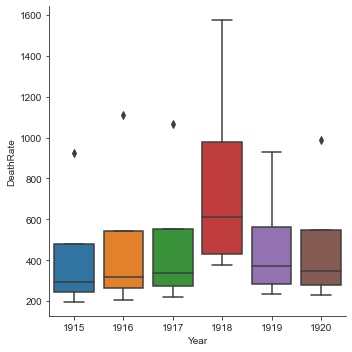

In [41]:
sns.catplot(data=mortality_data.query('Year >= 1915 and Year <= 1920'), 
            kind='box', x='Year', y='DeathRate')

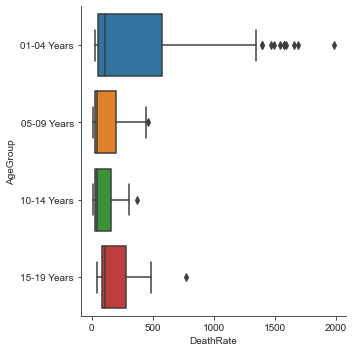

In [47]:
sns.catplot(data=mortality_data,
            kind='box', x='DeathRate', y='AgeGroup', orient='h')

## Histogram

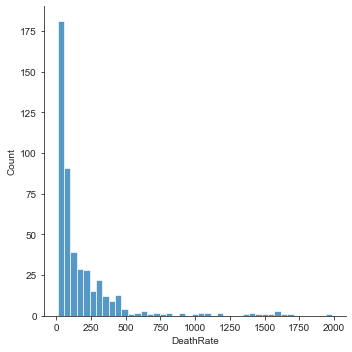

In [50]:
sns.displot(data=mortality_data, kind='hist', x='DeathRate')

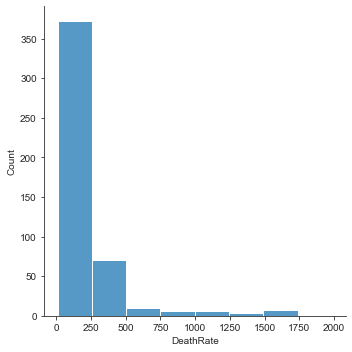

In [51]:
sns.displot(data=mortality_data, kind='hist', x='DeathRate', bins=8)

## KDE and ECDF plots

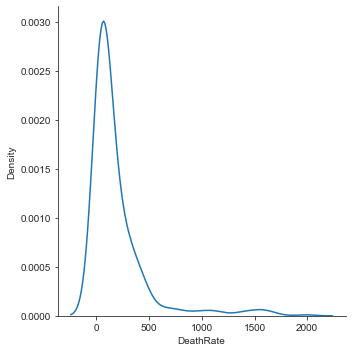

In [52]:
sns.displot(data=mortality_data, kind='kde', x='DeathRate')

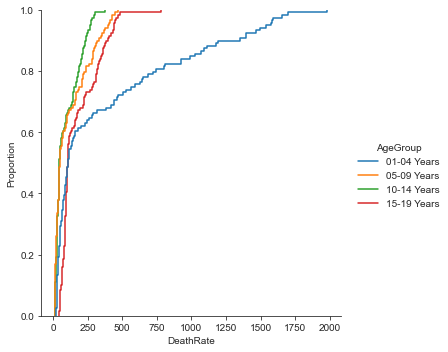

In [53]:
# Empirical Cumulative Distribution Function
sns.displot(data=mortality_data, kind='ecdf', x='DeathRate', hue='AgeGroup')

## Enhanced distribution plots

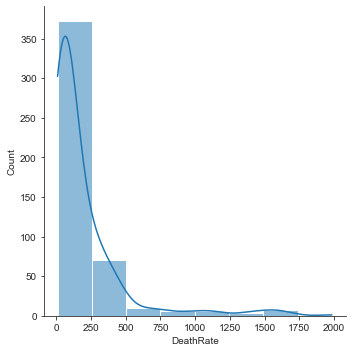

In [54]:
sns.displot(data=mortality_data, kind='hist', 
            x='DeathRate', kde=True, bins=8)

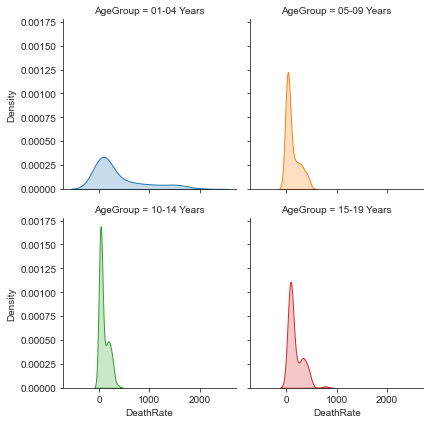

In [55]:
sns.displot(data=mortality_data, kind='kde', x='DeathRate', hue='AgeGroup', 
            fill=True, col='AgeGroup', col_wrap=2, height=3, legend=False)

## Axes methods for enhancing a plot

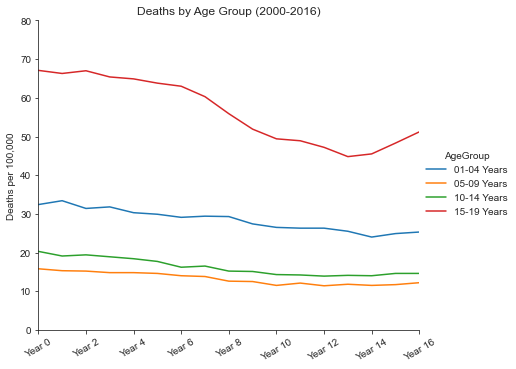

In [56]:
g = sns.relplot(
    data=mortality_data, 
    kind='line', x='Year', y='DeathRate', hue='AgeGroup', aspect=1.25)
for ax in g.axes.flat:
    ax.set_title('Deaths by Age Group (2000-2016)')
    ax.set_xlabel('')
    ax.set_xticks([x for x in range(2000,2017,2)])
    ax.set_xticklabels(['Year ' + str(x) for x in range(0,17,2)])
    ax.tick_params('x', labelrotation=30)
    ax.set_ylabel('Deaths per 100,000')
    ax.set_xlim(2000,2016)
    ax.set_ylim(0,80)

## Annotate a plot

Text(1925, 1900, 'Spanish Flu Pandemic')

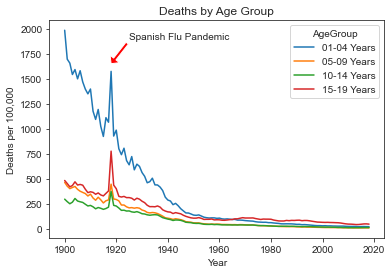

In [59]:
ax = sns.lineplot(data=mortality_data, 
                  x='Year', y='DeathRate', hue='AgeGroup')
ax.set_title('Deaths by Age Group')
ax.set_ylabel('Deaths per 100,000')
ax.annotate(text='Spanish Flu Pandemic', 
    xy=(1918, 1650), xytext=(1925, 1900)
     , 
     arrowprops=dict(facecolor='red', width=3, headwidth=12, headlength=6)
    )

## Set color palette

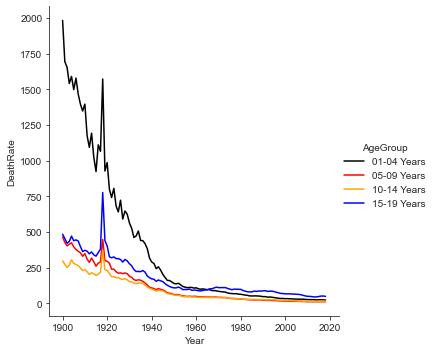

In [60]:
colors = ['black','red','orange','blue']
sns.set_palette(sns.color_palette(colors))
sns.relplot(data=mortality_data, kind='line',
            x='Year', y='DeathRate', hue='AgeGroup')

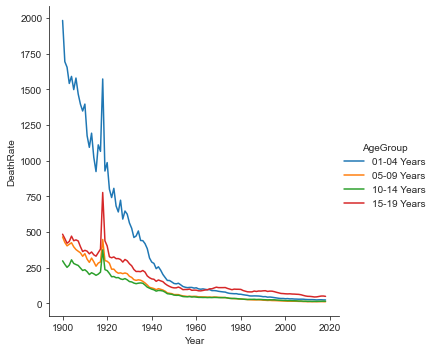

In [63]:
sns.set_palette(sns.color_palette('tab10'))
sns.relplot(data=mortality_data, kind='line',
            x='Year', y='DeathRate', hue='AgeGroup')

## Axes methods for enhancing subplots

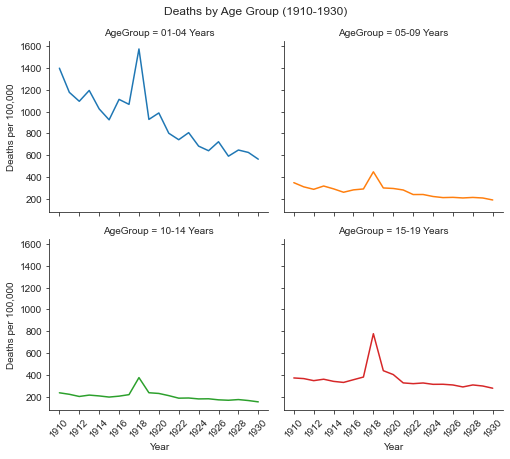

In [64]:
g = sns.relplot(
    data=mortality_data.query('Year >= 1910 and Year <= 1930'),
    kind='line', x='Year', y='DeathRate', hue='AgeGroup', legend=False,
    col='AgeGroup', col_wrap=2, height=3, aspect=1.2)
g.fig.suptitle('Deaths by Age Group (1910-1930)', y=1.025)
for ax in g.axes.flat:
    ax.set_ylabel('Deaths per 100,000')
    ax.set_xticks([x for x in range(1910, 1931, 2)])
    ax.tick_params('x', labelrotation=45)   

## Custom titles for subplots

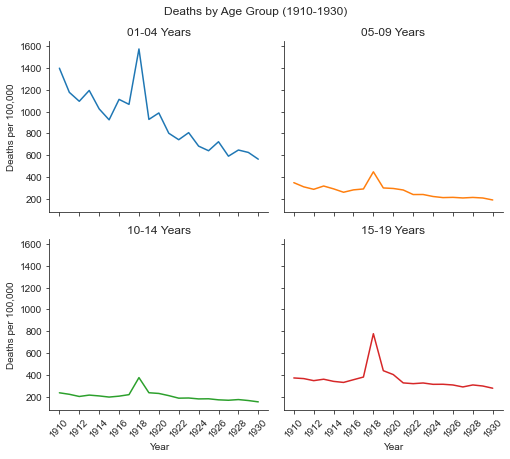

In [65]:
g = sns.relplot(
    data=mortality_data.query('Year >= 1910 and Year <= 1930'), 
    kind='line', x='Year', y='DeathRate', hue='AgeGroup', legend=False, 
    col='AgeGroup', col_wrap=2, height=3, aspect=1.2)
g.fig.suptitle('Deaths by Age Group (1910-1930)', y=1.025)
ageGroups = mortality_data['AgeGroup'].drop_duplicates().tolist()
for index, ax in enumerate(g.axes.flat):
    ax.set_title(ageGroups[index])
    ax.set_ylabel('Deaths per 100,000')
    ax.set_xticks([x for x in range(1910, 1931, 2)])
    ax.tick_params('x', labelrotation=45)

## Set the size for a specific plot

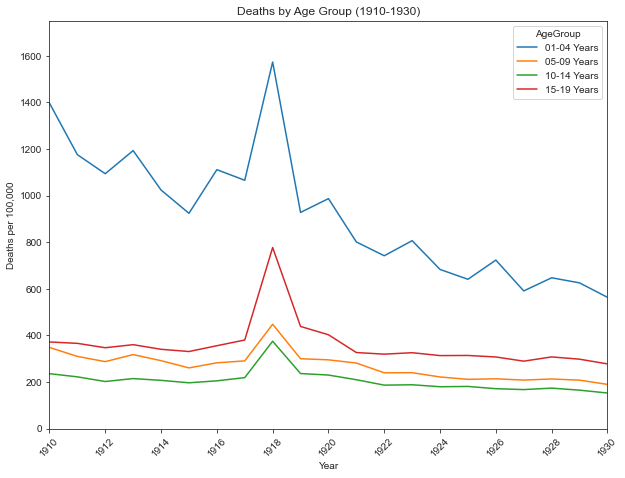

In [66]:
# import a Matplotlib module and set the figure size
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10,7.5)) 

# create the line plot
sns.lineplot(data=mortality_data, x='Year', y='DeathRate', hue='AgeGroup')

# use the ax and fig objects to enhance and save the plot
ax.set(title='Deaths by Age Group (1910-1930)', 
    ylabel='Deaths per 100,000', 
    xticks=[x for x in range(1910, 1931, 2)], 
    xlim=(1910,1930), ylim=(0,1750)),
ax.tick_params('x', labelrotation=45)
fig.savefig('deaths_by_age_group_line.png')